In [1]:
import pypsa
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import cartopy.crs as ccrs
from matplotlib.patches import Circle, Ellipse
from matplotlib.legend_handler import HandlerPatch

In [2]:

baseline = pypsa.Network('/home/sahiljotwani/storage-diss/pypsa-eur/results/networks/20_1H-GB_baseline_fixedEP.nc')
fixedEPo = pypsa.Network('/home/sahiljotwani/storage-diss/pypsa-eur/results/networks/20_1H-GB_fixedEP_opt.nc')
fixedEPr = pypsa.Network('/home/sahiljotwani/storage-diss/pypsa-eur/results/networks/20_1H-GB_fixedEP_rea.nc')
fixedEPp = pypsa.Network('/home/sahiljotwani/storage-diss/pypsa-eur/results/networks/20_1H-GB_fixedEP_pes.nc')
varEPo = pypsa.Network('/home/sahiljotwani/storage-diss/pypsa-eur/results/networks/20_1H-GB_varEP_opt.nc')
varEPr = pypsa.Network('/home/sahiljotwani/storage-diss/pypsa-eur/results/networks/20_1H-GB_varEP_rea.nc')
varEPp = pypsa.Network('/home/sahiljotwani/storage-diss/pypsa-eur/results/networks/20_1H-GB_varEP_pes.nc')

INFO:pypsa.io:Imported network 20_1H-GB_baseline_fixedEP.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units
INFO:pypsa.io:Imported network 20_1H-GB_fixedEP_opt.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units
INFO:pypsa.io:Imported network 20_1H-GB_fixedEP_rea.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units
INFO:pypsa.io:Imported network 20_1H-GB_fixedEP_pes.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units
INFO:pypsa.io:Imported network 20_1H-GB_varEP_opt.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network 20_1H-GB_varEP_rea.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network 20_1H-GB_varEP_pes.nc has buses, carriers, generators, global_constraints, lines, links, loads

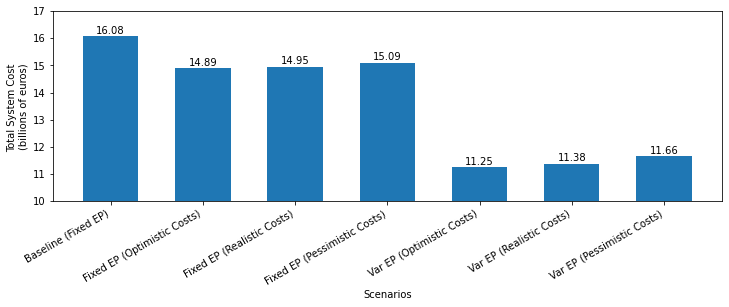

In [79]:
# from sympy import rotations

plt.rcParams["figure.figsize"] = [12, 3.5]

x_costs=["Baseline (Fixed EP)", "Fixed EP (Optimistic Costs)", "Fixed EP (Realistic Costs)", "Fixed EP (Pessimistic Costs)", "Var EP (Optimistic Costs)", "Var EP (Realistic Costs)", "Var EP (Pessimistic Costs)"]
t_costs = np.array([baseline.objective, fixedEPo.objective, fixedEPr.objective, fixedEPp.objective, varEPo.objective, varEPr.objective, varEPp.objective])
t_costs = t_costs/1e9

X_axis = np.arange(len(x_costs))

fig, ax = plt.subplots()

ax.bar(X_axis, t_costs, 0.6)

def add_label(x_list, y_list):
    for i in range(7):
        plt.text(i,t_costs[i]+0.1,round(t_costs[i],2),ha="center" )

add_label(x_costs,t_costs)

ax.set_ylim((10, 17))

plt.xticks(X_axis, x_costs)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=30, ha="right" )
ax.set_xlabel("Scenarios")
ax.set_ylabel("Total System Cost \n(billions of euros)")
ax.plot()
plt.show()

In [4]:
batt_fEPo=fixedEPo.storage_units.groupby(fixedEPo.storage_units['carrier']=='battery').p_nom_opt.sum().values[1]/1e3
batt_fEPr=fixedEPr.storage_units.groupby(fixedEPr.storage_units['carrier']=='battery').p_nom_opt.sum().values[1]/1e3
batt_fEPp=fixedEPp.storage_units.groupby(fixedEPp.storage_units['carrier']=='battery').p_nom_opt.sum().values[1]/1e3

H2_fEPo=fixedEPo.storage_units.groupby(fixedEPo.storage_units['carrier']=='H2').p_nom_opt.sum().values[1]/1e3
H2_fEPr=fixedEPr.storage_units.groupby(fixedEPr.storage_units['carrier']=='H2').p_nom_opt.sum().values[1]/1e3
H2_fEPp=fixedEPp.storage_units.groupby(fixedEPp.storage_units['carrier']=='H2').p_nom_opt.sum().values[1]/1e3

CAES_fEPo=fixedEPo.storage_units.groupby(fixedEPo.storage_units['carrier']=='CAES').p_nom_opt.sum().values[1]/1e3
CAES_fEPr=fixedEPr.storage_units.groupby(fixedEPr.storage_units['carrier']=='CAES').p_nom_opt.sum().values[1]/1e3
CAES_fEPp=fixedEPp.storage_units.groupby(fixedEPp.storage_units['carrier']=='CAES').p_nom_opt.sum().values[1]/1e3

LAES_fEPo=fixedEPo.storage_units.groupby(fixedEPo.storage_units['carrier']=='LAES').p_nom_opt.sum().values[1]/1e3
LAES_fEPr=fixedEPr.storage_units.groupby(fixedEPr.storage_units['carrier']=='LAES').p_nom_opt.sum().values[1]/1e3
LAES_fEPp=fixedEPp.storage_units.groupby(fixedEPp.storage_units['carrier']=='LAES').p_nom_opt.sum().values[1]/1e3

ETES_fEPo=fixedEPo.storage_units.groupby(fixedEPo.storage_units['carrier']=='ETES').p_nom_opt.sum().values[1]/1e3
ETES_fEPr=fixedEPr.storage_units.groupby(fixedEPr.storage_units['carrier']=='ETES').p_nom_opt.sum().values[1]/1e3
ETES_fEPp=fixedEPp.storage_units.groupby(fixedEPp.storage_units['carrier']=='ETES').p_nom_opt.sum().values[1]/1e3

NaS_fEPo=fixedEPo.storage_units.groupby(fixedEPo.storage_units['carrier']=='NaS').p_nom_opt.sum().values[1]/1e3
NaS_fEPr=fixedEPr.storage_units.groupby(fixedEPr.storage_units['carrier']=='NaS').p_nom_opt.sum().values[1]/1e3
NaS_fEPp=fixedEPp.storage_units.groupby(fixedEPp.storage_units['carrier']=='NaS').p_nom_opt.sum().values[1]/1e3

FeFlow_fEPo=fixedEPo.storage_units.groupby(fixedEPo.storage_units['carrier']=='FeFlow').p_nom_opt.sum().values[1]/1e3
FeFlow_fEPr=fixedEPr.storage_units.groupby(fixedEPr.storage_units['carrier']=='FeFlow').p_nom_opt.sum().values[1]/1e3
FeFlow_fEPp=fixedEPp.storage_units.groupby(fixedEPp.storage_units['carrier']=='FeFlow').p_nom_opt.sum().values[1]/1e3
# fixedEPo.storage_units.groupby(['carrier']).p_nom_opt.sum()

In [5]:
batt_vEPo=varEPo.links.groupby(varEPo.links['carrier']=='battery discharger').p_nom_opt.sum().values[1]/1e3
batt_vEPr=varEPr.links.groupby(varEPr.links['carrier']=='battery discharger').p_nom_opt.sum().values[1]/1e3
batt_vEPp=varEPp.links.groupby(varEPp.links['carrier']=='battery discharger').p_nom_opt.sum().values[1]/1e3

H2_vEPo=varEPo.links.groupby(varEPo.links['carrier']=='H2 fuel cell').p_nom_opt.sum().values[1]/1e3
H2_vEPr=varEPr.links.groupby(varEPr.links['carrier']=='H2 fuel cell').p_nom_opt.sum().values[1]/1e3
H2_vEPp=varEPp.links.groupby(varEPp.links['carrier']=='H2 fuel cell').p_nom_opt.sum().values[1]/1e3

CAES_vEPo=varEPo.links.groupby(varEPo.links['carrier']=='CAES turbine').p_nom_opt.sum().values[1]/1e3
CAES_vEPr=varEPr.links.groupby(varEPr.links['carrier']=='CAES turbine').p_nom_opt.sum().values[1]/1e3
CAES_vEPp=varEPp.links.groupby(varEPp.links['carrier']=='CAES turbine').p_nom_opt.sum().values[1]/1e3

LAES_vEPo=varEPo.links.groupby(varEPo.links['carrier']=='LAES turbine').p_nom_opt.sum().values[1]/1e3
LAES_vEPr=varEPr.links.groupby(varEPr.links['carrier']=='LAES turbine').p_nom_opt.sum().values[1]/1e3
LAES_vEPp=varEPp.links.groupby(varEPp.links['carrier']=='LAES turbine').p_nom_opt.sum().values[1]/1e3

ETES_vEPo=varEPo.links.groupby(varEPo.links['carrier']=='ETES turbine').p_nom_opt.sum().values[1]/1e3
ETES_vEPr=varEPr.links.groupby(varEPr.links['carrier']=='ETES turbine').p_nom_opt.sum().values[1]/1e3
ETES_vEPp=varEPp.links.groupby(varEPp.links['carrier']=='ETES turbine').p_nom_opt.sum().values[1]/1e3

NaS_vEPo=varEPo.links.groupby(varEPo.links['carrier']=='NaS discharger').p_nom_opt.sum().values[1]/1e3
NaS_vEPr=varEPr.links.groupby(varEPr.links['carrier']=='NaS discharger').p_nom_opt.sum().values[1]/1e3
NaS_vEPp=varEPp.links.groupby(varEPp.links['carrier']=='NaS discharger').p_nom_opt.sum().values[1]/1e3

FeFlow_vEPo=varEPo.links.groupby(varEPo.links['carrier']=='FeFlow discharger').p_nom_opt.sum().values[1]/1e3
FeFlow_vEPr=varEPr.links.groupby(varEPr.links['carrier']=='FeFlow discharger').p_nom_opt.sum().values[1]/1e3
FeFlow_vEPp=varEPp.links.groupby(varEPp.links['carrier']=='FeFlow discharger').p_nom_opt.sum().values[1]/1e3

In [6]:
np.arange(42)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])

In [7]:
index=np.arange(3)
index2=index+3
index2


array([3, 4, 5])

In [8]:
index=np.arange(7)
dis_cap_fEPo = pd.DataFrame(
    {"scenario":["fixed-EP optimistic","fixed-EP optimistic","fixed-EP optimistic",
    "fixed-EP optimistic","fixed-EP optimistic","fixed-EP optimistic","fixed-EP optimistic"],
     "technology":["Lithium", "H2", "CAES", "LAES", "ETES", "NaS", "FeFlow"],
     "discharge capacities (GW)": [batt_fEPo, H2_fEPo, CAES_fEPo, LAES_fEPo, ETES_fEPo, NaS_fEPo, FeFlow_fEPo ]},
     index=index
)

dis_cap_fEPr = pd.DataFrame(
    {"scenario":["fixed-EP realistic","fixed-EP realistic","fixed-EP realistic",
    "fixed-EP realistic","fixed-EP realistic","fixed-EP realistic","fixed-EP realistic"],
     "technology":["Lithium", "H2", "CAES", "LAES", "ETES", "NaS", "FeFlow"],
     "discharge capacities (GW)": [batt_fEPr, H2_fEPr, CAES_fEPr, LAES_fEPr, ETES_fEPr, NaS_fEPr, FeFlow_fEPr ]},
     index=index+7
)

dis_cap_fEPp = pd.DataFrame(
    {"scenario":["fixed-EP pessimistic","fixed-EP pessimistic","fixed-EP pessimistic","fixed-EP pessimistic",
    "fixed-EP pessimistic","fixed-EP pessimistic","fixed-EP pessimistic",],
     "technology":["Lithium", "H2", "CAES", "LAES", "ETES", "NaS", "FeFlow"],
     "discharge capacities (GW)": [batt_fEPp, H2_fEPp, CAES_fEPp, LAES_fEPp, ETES_fEPp, NaS_fEPp, FeFlow_fEPp ]},
     index=index+14
)

dis_cap_vEPo = pd.DataFrame(
    {"scenario":["var-EP optimistic","var-EP optimistic","var-EP optimistic","var-EP optimistic",
    "var-EP optimistic","var-EP optimistic","var-EP optimistic"],
     "technology":["Lithium", "H2", "CAES", "LAES", "ETES", "NaS", "FeFlow"],
     "discharge capacities (GW)": [batt_vEPo, H2_vEPo, CAES_vEPo, LAES_vEPo, ETES_vEPo, NaS_vEPo, FeFlow_vEPo ]},
     index=index+21
)

dis_cap_vEPr = pd.DataFrame(
    {"scenario":["var-EP realistic","var-EP realistic","var-EP realistic","var-EP realistic",
    "var-EP realistic","var-EP realistic","var-EP realistic"],
     "technology":["Lithium", "H2", "CAES", "LAES", "ETES", "NaS", "FeFlow"],
     "discharge capacities (GW)": [batt_vEPr, H2_vEPr, CAES_vEPr, LAES_vEPr, ETES_vEPr, NaS_vEPr, FeFlow_vEPr ]},
     index=index+28
)

dis_cap_vEPp = pd.DataFrame(
    {"scenario":["var-EP pessimistic","var-EP pessimistic","var-EP pessimistic","var-EP pessimistic",
    "var-EP pessimistic","var-EP pessimistic","var-EP pessimistic"],
     "technology":["Lithium", "H2", "CAES", "LAES", "ETES", "NaS", "FeFlow"],
     "discharge capacities (GW)": [batt_vEPp, H2_vEPp, CAES_vEPp, LAES_vEPp, ETES_vEPp, NaS_vEPp, FeFlow_vEPp ]},
     index=index+35
)

dis_cap=pd.concat([dis_cap_fEPo, dis_cap_fEPr, dis_cap_fEPp, dis_cap_vEPo, dis_cap_vEPr, dis_cap_vEPp])
dis_cap

,scenario,technology,discharge capacities (GW)
0,fixed-EP optimistic,Lithium,0.001172
1,fixed-EP optimistic,H2,13.885156
2,fixed-EP optimistic,CAES,18.500433
3,fixed-EP optimistic,LAES,0.002526
4,fixed-EP optimistic,ETES,0.001244
5,fixed-EP optimistic,NaS,0.000413
6,fixed-EP optimistic,FeFlow,2.131283
7,fixed-EP realistic,Lithium,0.001052
8,fixed-EP realistic,H2,14.073714
9,fixed-EP realistic,CAES,20.386211


In [9]:
dis_cap[dis_cap['technology']=='FeFlow'].values[:,2]


array([2.131282961855197, 0.0005803259190904625, 0.0007820619230599443,
       0.103303547606876, 0.0010635107139368766, 0.0005792095604911813],
      dtype=object)

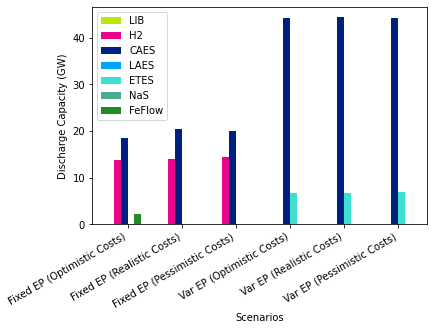

In [10]:
x_cap=["Fixed EP (Optimistic Costs)", "Fixed EP (Realistic Costs)", "Fixed EP (Pessimistic Costs)", "Var EP (Optimistic Costs)", "Var EP (Realistic Costs)", "Var EP (Pessimistic Costs)"]

lithium = dis_cap[dis_cap['technology']=='Lithium'].values[:,2]
hydrogen = dis_cap[dis_cap['technology']=='H2'].values[:,2]
CAES = dis_cap[dis_cap['technology']=='CAES'].values[:,2]
LAES = dis_cap[dis_cap['technology']=='LAES'].values[:,2]
ETES = dis_cap[dis_cap['technology']=='ETES'].values[:,2]
NaS = dis_cap[dis_cap['technology']=='NaS'].values[:,2]
FeFlow = dis_cap[dis_cap['technology']=='FeFlow'].values[:,2]

width=0.125

X_axis = np.arange(len(x_cap))

fig, ax1 = plt.subplots()
plt.rcParams["figure.figsize"] = [20, 3.5]

bar1 = plt.bar(X_axis-0.0625-0.25, lithium, width, color='#b8ea04')
bar2 = plt.bar(X_axis-0.0625-0.125, hydrogen, width, color='#ea048a')
bar3 = plt.bar(X_axis-0.0625, CAES, width, color='#002080')
bar4 = plt.bar(X_axis, LAES, width, color='#00a4ff')
bar5 = plt.bar(X_axis+0.0625, ETES, width, color='#40e0d0')
bar6 = plt.bar(X_axis+0.0625+0.125, NaS, width, color='#4aab90')
bar7 = plt.bar(X_axis+0.0625+0.125, FeFlow, width, color='#228b22')

plt.xlabel('Scenarios')
plt.ylabel('Discharge Capacity (GW)')

plt.setp( ax1.xaxis.get_majorticklabels(), rotation=30, ha="right" )
plt.xticks(X_axis, x_cap)
plt.legend([bar1, bar2, bar3, bar4, bar5, bar6, bar7],
            ['LIB', 'H2', 'CAES', 'LAES', 'ETES', 'NaS', 'FeFlow'])

plt.show()

In [100]:
print(FeFlow)

[2.131282961855197 0.0005803259190904625 0.0007820619230599443
 0.103303547606876 0.0010635107139368766 0.0005792095604911813]


In [11]:
data = {'Scenario': ['Fixed EP', 'Variable EP', 'Fixed EP', 'Variable EP', 'Fixed EP', 'Variable EP','Fixed EP', 'Variable EP',
                    'Fixed EP', 'Variable EP','Fixed EP', 'Variable EP','Fixed EP', 'Variable EP'],
                    
         'Devices': ['LIB', 'LIB', 'H2', 'H2', 'CAES', 'CAES', 'LAES', 'LAES', 'ETES', 'ETES', 'NaS', 'NaS', 'FeFlow', 'FeFlow'],
         
         'MarketPotential': [0, 0, 14.07, 0.02, 20.39, 44.42, 0, 0.01, 0, 6.75, 0, 0, 0, 0]}

df_power = pd.DataFrame(data, columns = ['Devices','Scenario','MarketPotential'])
df_power

,Devices,Scenario,MarketPotential
0,LIB,Fixed EP,0.00
1,LIB,Variable EP,0.00
2,H2,Fixed EP,14.07
3,H2,Variable EP,0.02
4,CAES,Fixed EP,20.39
5,CAES,Variable EP,44.42
6,LAES,Fixed EP,0.00
7,LAES,Variable EP,0.01
8,ETES,Fixed EP,0.00
9,ETES,Variable EP,6.75


In [12]:
varEPr.stores.groupby(['carrier']).e_nom_opt.sum()/1e6

carrier
CAES       6.866623
ETES       0.016325
FeFlow     0.000008
H2         0.000113
LAES       0.000027
NaS        0.000001
battery    0.000009
Name: e_nom_opt, dtype: float64

In [13]:
data = {'Scenario': ['Fixed EP', 'Variable EP', 'Fixed EP', 'Variable EP', 'Fixed EP', 'Variable EP','Fixed EP', 'Variable EP',
                    'Fixed EP', 'Variable EP','Fixed EP', 'Variable EP','Fixed EP', 'Variable EP'],
                    
         'Devices': ['LIB', 'LIB', 'H2', 'H2', 'CAES', 'CAES', 'LAES', 'LAES', 'ETES', 'ETES', 'NaS', 'NaS', 'FeFlow', 'FeFlow'],
         
         'MarketPotential': [0, 0, 2.36, 0, 0.49, 6.87, 0, 0, 0, 0.02, 0, 0, 0, 0]}

df_energy = pd.DataFrame(data, columns = ['Devices','Scenario','MarketPotential'])
df_energy

,Devices,Scenario,MarketPotential
0,LIB,Fixed EP,0.00
1,LIB,Variable EP,0.00
2,H2,Fixed EP,2.36
3,H2,Variable EP,0.00
4,CAES,Fixed EP,0.49
5,CAES,Variable EP,6.87
6,LAES,Fixed EP,0.00
7,LAES,Variable EP,0.00
8,ETES,Fixed EP,0.00
9,ETES,Variable EP,0.02


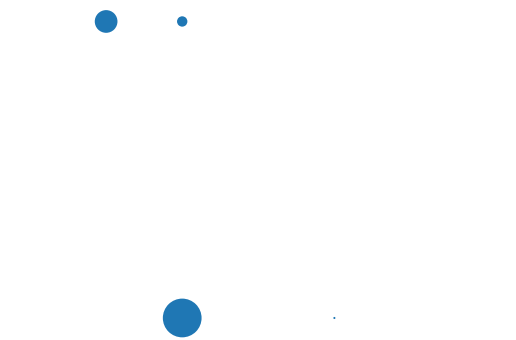

In [14]:
fig, ax = plt.subplots(figsize=(9,6))
sns.scatterplot(data=df_energy, x="Devices", y="Scenario", size="MarketPotential",sizes=(0, 1500),clip_on=False)

ax.get_legend().remove()
ax.set_axis_off()

In [15]:
def make_handler_map_to_scale_circles_as_in(ax, dont_resize_actively=False):
    fig = ax.get_figure()

    def axes2pt():
        return np.diff(ax.transData.transform([(0, 0), (1, 1)]), axis=0)[0] * (
            300.0 / fig.dpi
        )

    ellipses = []
    if not dont_resize_actively:

        def update_width_height(event):
            dist = axes2pt()
            for e, radius in ellipses:
                e.width, e.height = 2.0 * radius * dist

        fig.canvas.mpl_connect("resize_event", update_width_height)
        ax.callbacks.connect("xlim_changed", update_width_height)
        ax.callbacks.connect("ylim_changed", update_width_height)

    def legend_circle_handler(
        legend, orig_handle, xdescent, ydescent, width, height, fontsize
    ):
        w, h = 2.0 * orig_handle.get_radius() * axes2pt()
        e = Ellipse(
            xy=(0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent),
            width=w,
            height=w,
        )
        ellipses.append((e, orig_handle.get_radius()))
        return e

    return {Circle: HandlerPatch(patch_func=legend_circle_handler)}


def make_legend_circles_for(sizes, scale=1.0, **kw):
    return [Circle((0, 0), radius=(s / scale) ** 0.5, **kw) for s in sizes]


def add_legend(ax, bus_factor, branch_factor):

    handles = []
    labels = []
    for s in (2, 5, 10):
        handles.append(
            plt.Line2D([0], [0], color="rosybrown", linewidth=s * 1e3 / branch_factor)
        )
        labels.append(f"{s} GW")
    l1 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0, 0),
        frameon=False,
        labelspacing=0.8,
        handletextpad=1.5,
        title="HVAC Line Capacity",
    )
    ax.add_artist(l1)

    handles = []
    labels = []
    for s in (2, 5, 10):
        handles.append(
            plt.Line2D(
                [0], [0], color="darkseagreen", linewidth=s * 1e3 / branch_factor
            )
        )
        labels.append(f"{s} GW")
    l2 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0.2, -0.0),
        frameon=False,
        labelspacing=0.8,
        handletextpad=1.5,
        title="HVDC Link Capacity",
    )
    ax.add_artist(l2)

    handles = []
    labels = []
    n.carriers = n.carriers.loc[['geothermal','offwind-ac', 'offwind-dc', 'solar', 'biomass', 'onwind', 'nuclear', 'hydro', 'ror']]
    if "Load" in n.carriers.index:
        n.carriers = n.carriers.drop("Load")
    for name, carrier in n.carriers.iterrows():
        handles.append(
            plt.Line2D(
                [0], [0], color=carrier.color, marker="o", markersize=8, linewidth=0
            )
        )
        labels.append(carrier.nice_name)
    l3 = ax.legend(
        handles,
        labels,
        loc="upper center",
        bbox_to_anchor=(0.58, -0.0),  # bbox_to_anchor=(0.72, -0.05),
        handletextpad=0.0,
        columnspacing=0.5,
        ncol=2,
        title="Technology",
        frameon=False,
    )
    ax.add_artist(l3)

    circles = [1000, 500, 100]
    handles = make_legend_circles_for(circles, scale=bus_factor, facecolor="lightgray")
    labels = [f"{int(s/1e2)} GW" for s in circles]
    l4 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0.82, 0.0),
        frameon=False,
        labelspacing=4,
        title="Generation",
        handler_map=make_handler_map_to_scale_circles_as_in(ax, True),
    )
    ax.add_artist(l4)


def plot_network(n, fn=None):

    bus_factor = 5.5e4
    branch_factor = 2e3

    fields = ["bus", "carrier", "p_nom_opt"]
    pie_components = pd.concat(
        [
            n.generators.loc[n.generators.carrier != "load", fields]
            # n.storage_units[fields],
        ]
    )
    bus_sizes = pie_components.groupby(["bus", "carrier"]).p_nom_opt.sum() / bus_factor

    def clip(df, thres=500):
        return df.where(df > thres, other=0.0)

    line_widths = clip(n.lines.s_nom_opt - n.lines.s_nom) / branch_factor
    link_widths = clip(n.links.p_nom_opt - n.links.p_nom) / branch_factor
    line_widths_opt = clip(n.lines.s_nom_opt) / branch_factor

    fig, ax = plt.subplots(
        figsize=(11, 11), subplot_kw={"projection": ccrs.PlateCarree()}
    )

    n.plot(
        ax=ax,
        bus_sizes=bus_sizes,
        color_geomap=True,
        bus_alpha=0.7,
        line_widths=line_widths_opt,
        line_colors="#dddddd",
    )

    n.plot(
        ax=ax,
        geomap=False,
        bus_sizes=0,
        line_widths=line_widths,
        link_widths=link_widths,
    )

    add_legend(ax, bus_factor, branch_factor)

    if fn is not None:
        plt.savefig(fn, bbox_inches="tight")

INFO:pypsa.io:Imported network 20_1H-GB_fixedEP_rea.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


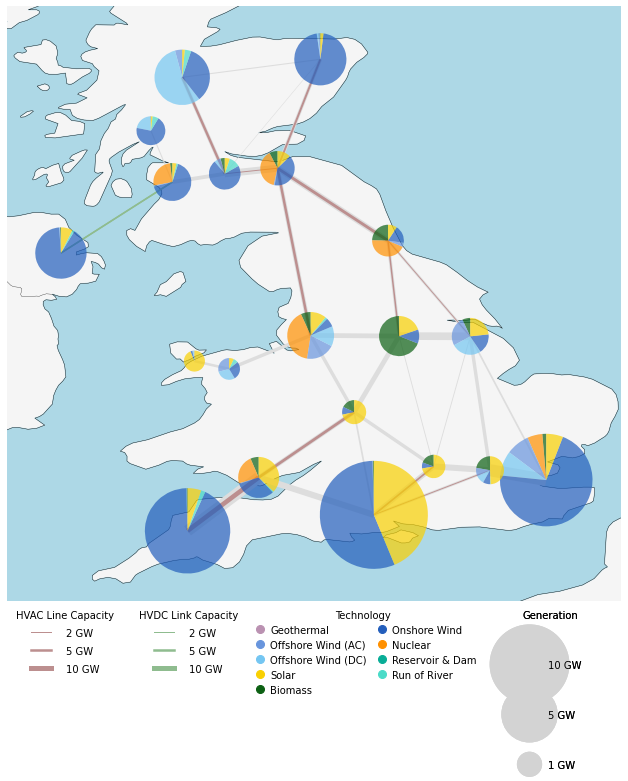

In [16]:
fixedEPr=pypsa.Network('/home/sahiljotwani/storage-diss/pypsa-eur/results/networks/20_1H-GB_fixedEP_rea.nc')
n=fixedEPr
plot_network(n, fn=None)

In [17]:
def make_handler_map_to_scale_circles_as_in(ax, dont_resize_actively=False):
    fig = ax.get_figure()

    def axes2pt():
        return np.diff(ax.transData.transform([(0, 0), (1, 1)]), axis=0)[0] * (
            300.0 / fig.dpi
        )

    ellipses = []
    if not dont_resize_actively:

        def update_width_height(event):
            dist = axes2pt()
            for e, radius in ellipses:
                e.width, e.height = 2.0 * radius * dist

        fig.canvas.mpl_connect("resize_event", update_width_height)
        ax.callbacks.connect("xlim_changed", update_width_height)
        ax.callbacks.connect("ylim_changed", update_width_height)

    def legend_circle_handler(
        legend, orig_handle, xdescent, ydescent, width, height, fontsize
    ):
        w, h = 2.0 * orig_handle.get_radius() * axes2pt()
        e = Ellipse(
            xy=(0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent),
            width=w,
            height=w,
        )
        ellipses.append((e, orig_handle.get_radius()))
        return e

    return {Circle: HandlerPatch(patch_func=legend_circle_handler)}


def make_legend_circles_for(sizes, scale=1.0, **kw):
    return [Circle((0, 0), radius=(s / scale) ** 0.5, **kw) for s in sizes]


def add_legend(ax, bus_factor, branch_factor):

    handles = []
    labels = []
    for s in (2, 5, 10):
        handles.append(
            plt.Line2D([0], [0], color="rosybrown", linewidth=s * 1e3 / branch_factor)
        )
        labels.append(f"{s} GW")
    l1 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0, 0),
        frameon=False,
        labelspacing=0.8,
        handletextpad=1.5,
        title="HVAC Line Capacity",
    )
    ax.add_artist(l1)

    handles = []
    labels = []
    for s in (2, 5, 10):
        handles.append(
            plt.Line2D(
                [0], [0], color="darkseagreen", linewidth=s * 1e3 / branch_factor
            )
        )
        labels.append(f"{s} GW")
    l2 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0.2, -0.0),
        frameon=False,
        labelspacing=0.8,
        handletextpad=1.5,
        title="HVDC Link Capacity",
    )
    ax.add_artist(l2)

    handles = []
    labels = []
    ##########
    n.carriers = n.carriers.loc[['H2','battery','CAES','LAES','ETES','NaS','FeFlow']]
    if "Load" in n.carriers.index:
        n.carriers = n.carriers.drop("Load")
    for name, carrier in n.carriers.iterrows():
        handles.append(
            plt.Line2D(
                [0], [0], color=carrier.color, marker="o", markersize=8, linewidth=0
            )
        )
        labels.append(carrier.nice_name)
    l3 = ax.legend(
        handles,
        labels,
        loc="upper center",
        bbox_to_anchor=(0.58, -0.0),  # bbox_to_anchor=(0.72, -0.05),
        handletextpad=0.0,
        columnspacing=0.5,
        ncol=1,
        title="Technology",
        frameon=False,
    )
    ax.add_artist(l3)

    # circles = [50000, 10000]
    circles = [1000,500]
    handles = make_legend_circles_for(circles, scale=bus_factor, facecolor="lightgray")
    labels = [f"{int(s/1e2)} GW" for s in circles]
    l4 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0.82, 0.0),
        frameon=False,
        labelspacing=4,
        title="Generation",
        handler_map=make_handler_map_to_scale_circles_as_in(ax, True),
    )
    ax.add_artist(l4)


def plot_network(n, fn=None):

    # bus_factor = 1e6
    bus_factor = 5.5e4
    branch_factor = 2e3

    fields = ["bus0", "carrier", "p_nom_opt"]
    pie_components = n.storage_units.loc[n.storage_units['carrier'].apply(lambda x: x in ['H2','battery','CAES','LAES','ETES','NaS','FeFlow'])].iloc[:,:]
    bus_sizes = pie_components.groupby(["bus", "carrier"]).p_nom_opt.sum() / bus_factor

    def clip(df, thres=500):
        return df.where(df > thres, other=0.0)

    line_widths = clip(n.lines.s_nom_opt - n.lines.s_nom) / branch_factor
    link_widths = clip(n.links.p_nom_opt - n.links.p_nom) / branch_factor
    line_widths_opt = clip(n.lines.s_nom_opt) / branch_factor

    fig, ax = plt.subplots(
        figsize=(11, 11), subplot_kw={"projection": ccrs.PlateCarree()}
    )

    n.plot(
        ax=ax,
        bus_sizes=bus_sizes,
        color_geomap=True,
        bus_alpha=0.7,
        line_widths=line_widths_opt,
        line_colors="#dddddd",
    )

    n.plot(
        ax=ax,
        geomap=False,
        bus_sizes=0,
        line_widths=line_widths,
        link_widths=link_widths,
    )

    add_legend(ax, bus_factor, branch_factor)

    if fn is not None:
        plt.savefig(fn, bbox_inches="tight")
        

INFO:pypsa.io:Imported network 20_1H-GB_fixedEP_rea.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


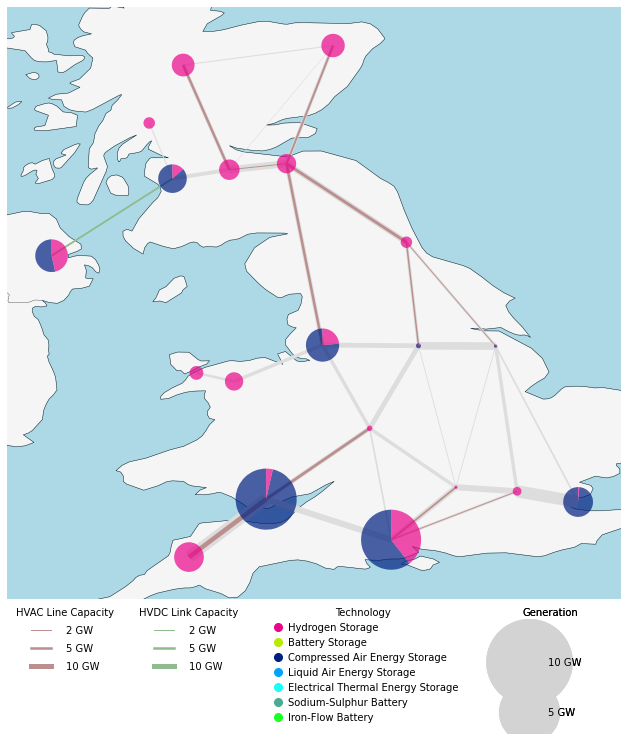

In [18]:
fixedEPr=pypsa.Network('/home/sahiljotwani/storage-diss/pypsa-eur/results/networks/20_1H-GB_fixedEP_rea.nc')
n=fixedEPr
plot_network(n, fn=None)

In [19]:
def make_handler_map_to_scale_circles_as_in(ax, dont_resize_actively=False):
    fig = ax.get_figure()

    def axes2pt():
        return np.diff(ax.transData.transform([(0, 0), (1, 1)]), axis=0)[0] * (
            300.0 / fig.dpi
        )

    ellipses = []
    if not dont_resize_actively:

        def update_width_height(event):
            dist = axes2pt()
            for e, radius in ellipses:
                e.width, e.height = 2.0 * radius * dist

        fig.canvas.mpl_connect("resize_event", update_width_height)
        ax.callbacks.connect("xlim_changed", update_width_height)
        ax.callbacks.connect("ylim_changed", update_width_height)

    def legend_circle_handler(
        legend, orig_handle, xdescent, ydescent, width, height, fontsize
    ):
        w, h = 2.0 * orig_handle.get_radius() * axes2pt()
        e = Ellipse(
            xy=(0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent),
            width=w,
            height=w,
        )
        ellipses.append((e, orig_handle.get_radius()))
        return e

    return {Circle: HandlerPatch(patch_func=legend_circle_handler)}


def make_legend_circles_for(sizes, scale=1.0, **kw):
    return [Circle((0, 0), radius=(s / scale) ** 0.5, **kw) for s in sizes]


def add_legend(ax, bus_factor, branch_factor):

    handles = []
    labels = []
    for s in (2, 5, 10):
        handles.append(
            plt.Line2D([0], [0], color="rosybrown", linewidth=s * 1e3 / branch_factor)
        )
        labels.append(f"{s} GW")
    l1 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0, 0),
        frameon=False,
        labelspacing=0.8,
        handletextpad=1.5,
        title="HVAC Line Capacity",
    )
    ax.add_artist(l1)

    handles = []
    labels = []
    for s in (2, 5, 10):
        handles.append(
            plt.Line2D(
                [0], [0], color="darkseagreen", linewidth=s * 1e3 / branch_factor
            )
        )
        labels.append(f"{s} GW")
    l2 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0.2, -0.0),
        frameon=False,
        labelspacing=0.8,
        handletextpad=1.5,
        title="HVDC Link Capacity",
    )
    ax.add_artist(l2)

    handles = []
    labels = []
    n.carriers = n.carriers.loc[['geothermal','offwind-ac', 'offwind-dc', 'solar', 'biomass', 'onwind', 'nuclear', 'hydro', 'ror']]
    if "Load" in n.carriers.index:
        n.carriers = n.carriers.drop("Load")
    for name, carrier in n.carriers.iterrows():
        handles.append(
            plt.Line2D(
                [0], [0], color=carrier.color, marker="o", markersize=8, linewidth=0
            )
        )
        labels.append(carrier.nice_name)
    l3 = ax.legend(
        handles,
        labels,
        loc="upper center",
        bbox_to_anchor=(0.58, -0.0),  # bbox_to_anchor=(0.72, -0.05),
        handletextpad=0.0,
        columnspacing=0.5,
        ncol=2,
        title="Technology",
        frameon=False,
    )
    ax.add_artist(l3)

    circles = [1000, 500, 100]
    handles = make_legend_circles_for(circles, scale=bus_factor, facecolor="lightgray")
    labels = [f"{int(s/1e2)} GW" for s in circles]
    l4 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0.82, 0.0),
        frameon=False,
        labelspacing=4,
        title="Generation",
        handler_map=make_handler_map_to_scale_circles_as_in(ax, True),
    )
    ax.add_artist(l4)


def plot_network(n, fn=None):

    bus_factor = 5.5e4
    branch_factor = 2e3

    fields = ["bus", "carrier", "p_nom_opt"]
    pie_components = pd.concat(
        [
            n.generators.loc[n.generators.carrier != "load", fields]
            # n.storage_units[fields],
        ]
    )
    bus_sizes = pie_components.groupby(["bus", "carrier"]).p_nom_opt.sum() / bus_factor

    def clip(df, thres=500):
        return df.where(df > thres, other=0.0)

    line_widths = clip(n.lines.s_nom_opt - n.lines.s_nom) / branch_factor
    link_widths = clip(n.links.p_nom_opt - n.links.p_nom) / branch_factor
    line_widths_opt = clip(n.lines.s_nom_opt) / branch_factor

    fig, ax = plt.subplots(
        figsize=(11, 11), subplot_kw={"projection": ccrs.PlateCarree()}
    )

    n.plot(
        ax=ax,
        bus_sizes=bus_sizes,
        color_geomap=True,
        bus_alpha=0.7,
        line_widths=line_widths_opt,
        line_colors="#dddddd",
    )

    n.plot(
        ax=ax,
        geomap=False,
        bus_sizes=0,
        line_widths=line_widths,
        link_widths=link_widths,
    )

    add_legend(ax, bus_factor, branch_factor)

    if fn is not None:
        plt.savefig(fn, bbox_inches="tight")

INFO:pypsa.io:Imported network 20_1H-GB_varEP_rea.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


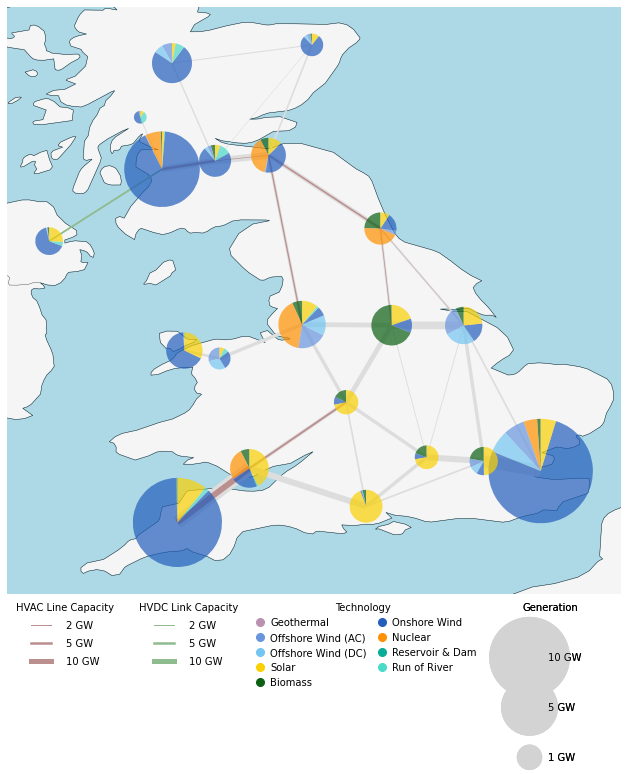

In [20]:
varEPr=pypsa.Network('/home/sahiljotwani/storage-diss/pypsa-eur/results/networks/20_1H-GB_varEP_rea.nc')
n=varEPr
plot_network(n, fn=None)

In [21]:
def make_handler_map_to_scale_circles_as_in(ax, dont_resize_actively=False):
    fig = ax.get_figure()

    def axes2pt():
        return np.diff(ax.transData.transform([(0, 0), (1, 1)]), axis=0)[0] * (
            300.0 / fig.dpi
        )

    ellipses = []
    if not dont_resize_actively:

        def update_width_height(event):
            dist = axes2pt()
            for e, radius in ellipses:
                e.width, e.height = 2.0 * radius * dist

        fig.canvas.mpl_connect("resize_event", update_width_height)
        ax.callbacks.connect("xlim_changed", update_width_height)
        ax.callbacks.connect("ylim_changed", update_width_height)

    def legend_circle_handler(
        legend, orig_handle, xdescent, ydescent, width, height, fontsize
    ):
        w, h = 2.0 * orig_handle.get_radius() * axes2pt()
        e = Ellipse(
            xy=(0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent),
            width=w,
            height=w,
        )
        ellipses.append((e, orig_handle.get_radius()))
        return e

    return {Circle: HandlerPatch(patch_func=legend_circle_handler)}


def make_legend_circles_for(sizes, scale=1.0, **kw):
    return [Circle((0, 0), radius=(s / scale) ** 0.5, **kw) for s in sizes]


def add_legend(ax, bus_factor, branch_factor):

    handles = []
    labels = []
    for s in (2, 5, 10):
        handles.append(
            plt.Line2D([0], [0], color="rosybrown", linewidth=s * 1e3 / branch_factor)
        )
        labels.append(f"{s} GW")
    l1 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0, 0),
        frameon=False,
        labelspacing=0.8,
        handletextpad=1.5,
        title="HVAC Line Capacity",
    )
    ax.add_artist(l1)

    handles = []
    labels = []
    for s in (2, 5, 10):
        handles.append(
            plt.Line2D(
                [0], [0], color="darkseagreen", linewidth=s * 1e3 / branch_factor
            )
        )
        labels.append(f"{s} GW")
    l2 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0.2, -0.0),
        frameon=False,
        labelspacing=0.8,
        handletextpad=1.5,
        title="HVDC Link Capacity",
    )
    ax.add_artist(l2)

    handles = []
    labels = []
    ##########
    n.carriers = n.carriers.loc[['H2','battery','CAES','LAES','ETES','NaS','FeFlow']]
    if "Load" in n.carriers.index:
        n.carriers = n.carriers.drop("Load")
    for name, carrier in n.carriers.iterrows():
        handles.append(
            plt.Line2D(
                [0], [0], color=carrier.color, marker="o", markersize=8, linewidth=0
            )
        )
        labels.append(carrier.nice_name)
    l3 = ax.legend(
        handles,
        labels,
        loc="upper center",
        bbox_to_anchor=(0.58, -0.0),  # bbox_to_anchor=(0.72, -0.05),
        handletextpad=0.0,
        columnspacing=0.5,
        ncol=1,
        title="Technology",
        frameon=False,
    )
    ax.add_artist(l3)

    # circles = [50000, 10000]
    circles = [1000,500]
    handles = make_legend_circles_for(circles, scale=bus_factor, facecolor="lightgray")
    labels = [f"{int(s/1e2)} GW" for s in circles]
    l4 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0.82, 0.0),
        frameon=False,
        labelspacing=4,
        title="Generation",
        handler_map=make_handler_map_to_scale_circles_as_in(ax, True),
    )
    ax.add_artist(l4)


def plot_network(n, fn=None):

    # bus_factor = 1e6
    bus_factor = 5.5e4
    branch_factor = 2e3

    fields = ["bus0", "carrier", "p_nom_opt"]
    pie_components = n.links.loc[n.links['carrier'].apply(lambda x: x in ['H2 fuel cell','battery discharger','CAES turbine','LAES turbine','ETES turbine','NaS discharger','FeFlow turbine'])].iloc[:,:]
    pie_components=pie_components.replace('H2 fuel cell', 'H2')
    pie_components=pie_components.replace('battery discharger', 'battery')
    pie_components=pie_components.replace('CAES turbine', 'CAES')
    pie_components=pie_components.replace('LAES turbine', 'LAES')
    pie_components=pie_components.replace('ETES turbine', 'ETES')
    pie_components=pie_components.replace('NaS discharger', 'NaS')
    pie_components=pie_components.replace('FeFlow discharger', 'FeFlow')
    bus_sizes = pie_components.groupby(["bus1", "carrier"]).p_nom_opt.sum() / bus_factor

    def clip(df, thres=500):
        return df.where(df > thres, other=0.0)

    line_widths = clip(n.lines.s_nom_opt - n.lines.s_nom) / branch_factor
    link_widths = clip(n.links.p_nom_opt - n.links.p_nom) / branch_factor
    line_widths_opt = clip(n.lines.s_nom_opt) / branch_factor

    fig, ax = plt.subplots(
        figsize=(11, 11), subplot_kw={"projection": ccrs.PlateCarree()}
    )

    n.plot(
        ax=ax,
        bus_sizes=bus_sizes,
        color_geomap=True,
        bus_alpha=0.7,
        line_widths=line_widths_opt,
        line_colors="#dddddd",
    )

    n.plot(
        ax=ax,
        geomap=False,
        bus_sizes=0,
        line_widths=line_widths,
        link_widths=link_widths,
    )

    add_legend(ax, bus_factor, branch_factor)

    if fn is not None:
        plt.savefig(fn, bbox_inches="tight")
        

INFO:pypsa.io:Imported network 20_1H-GB_varEP_rea.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


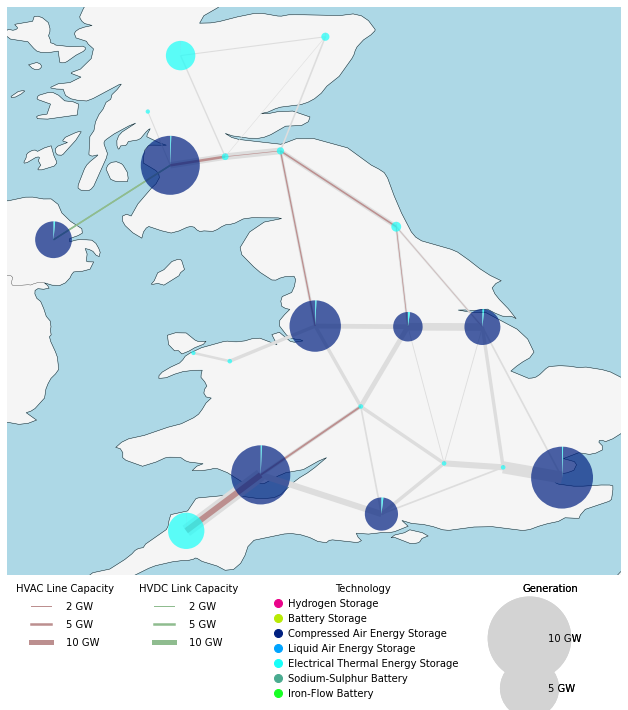

In [22]:
varEPr=pypsa.Network('/home/sahiljotwani/storage-diss/pypsa-eur/results/networks/20_1H-GB_varEP_rea.nc')
n=varEPr
plot_network(n, fn=None)

<AxesSubplot:xlabel='snapshot'>

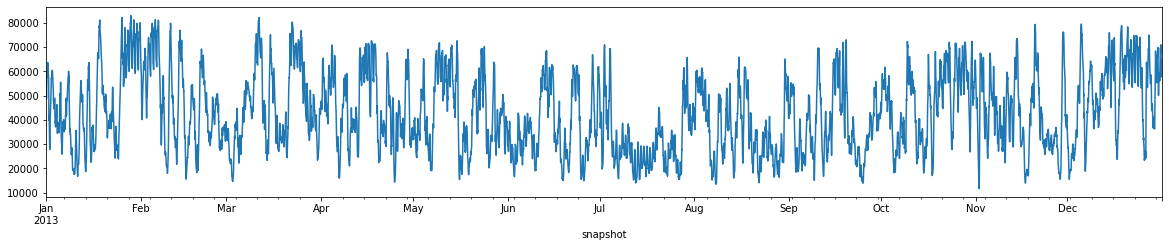

In [23]:
varEPr.generators_t.p.sum(axis=1).plot()

<AxesSubplot:xlabel='snapshot'>

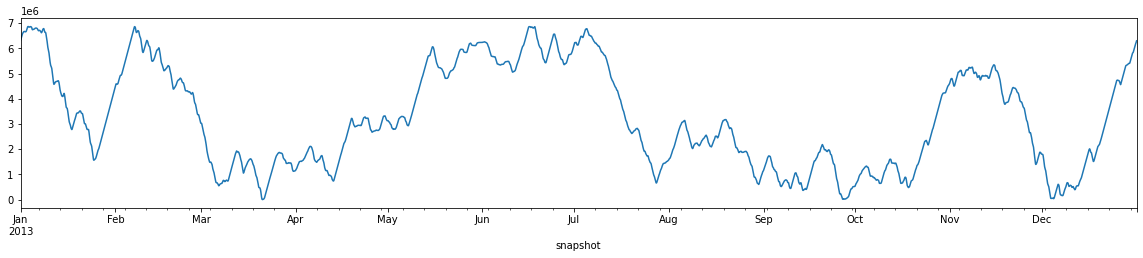

In [24]:
caes_stores_t=varEPr.stores_t.e.loc[:,'GB1 0 CAES']
for i in range(19):
    caes_stores_t = caes_stores_t + varEPr.stores_t.e.loc[:,'GB0 '+str(i)+' CAES']

caes_stores_t.plot()


<AxesSubplot:xlabel='snapshot'>

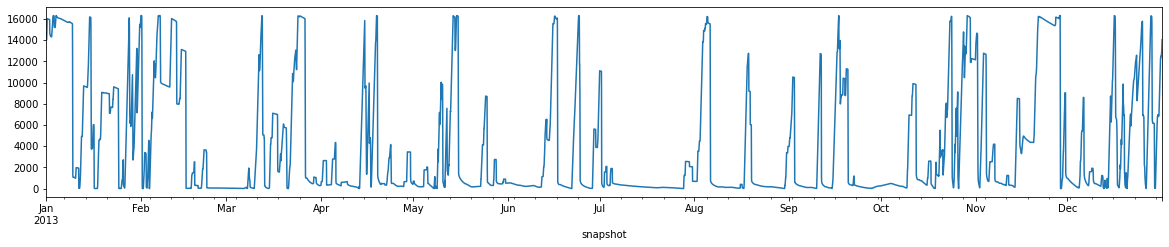

In [25]:
etes_stores_t = varEPr.stores_t.e.loc[:,'GB1 0 ETES']
for i in range(19):
    etes_stores_t = etes_stores_t + varEPr.stores_t.e.loc[:,'GB0 '+str(i)+' ETES']

etes_stores_t.plot()

<AxesSubplot:xlabel='snapshot'>

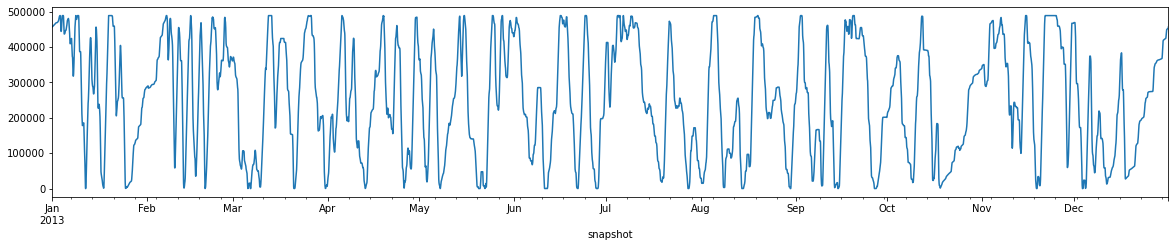

In [26]:
# fixedEPr.storage_units_t.state_of_charge.loc[:,'GB1 0 H2'].plot()

caes_soc_t = fixedEPr.storage_units_t.state_of_charge.loc[:,'GB1 0 CAES'] 
caesbus=['GB0 10 CAES', 'GB0 11 CAES', 'GB0 12 CAES', 'GB0 15 CAES', 'GB0 17 CAES', 'GB0 3 CAES', 'GB0 4 CAES']
for bus in caesbus:
    caes_soc_t = caes_soc_t+fixedEPr.storage_units_t.state_of_charge.loc[:,bus] 

caes_soc_t.plot()

In [27]:
fixedEPr.storage_units_t.state_of_charge.loc[:,'GB1 0 H2']
h2_soc_t = fixedEPr.storage_units_t.state_of_charge.loc[:,'GB1 0 H2']
for i in range(19):
    h2_soc_t=h2_soc_t+fixedEPr.storage_units_t.state_of_charge.loc[:,'GB0 '+str(i)+' H2']

h2_soc_t

snapshot
2013-01-01 00:00:00    2.104239e+06
2013-01-01 01:00:00    2.109655e+06
2013-01-01 02:00:00    2.115362e+06
2013-01-01 03:00:00    2.121191e+06
2013-01-01 04:00:00    2.127723e+06
                           ...     
2013-12-31 19:00:00    2.063097e+06
2013-12-31 20:00:00    2.069534e+06
2013-12-31 21:00:00    2.078792e+06
2013-12-31 22:00:00    2.088840e+06
2013-12-31 23:00:00    2.098840e+06
Length: 8760, dtype: float64

In [29]:
pd.date_range("2022-01-01 00:00", "2022-12-31 23:00", freq="H")

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2022-12-31 14:00:00', '2022-12-31 15:00:00',
               '2022-12-31 16:00:00', '2022-12-31 17:00:00',
               '2022-12-31 18:00:00', '2022-12-31 19:00:00',
               '2022-12-31 20:00:00', '2022-12-31 21:00:00',
               '2022-12-31 22:00:00', '2022-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq='H')

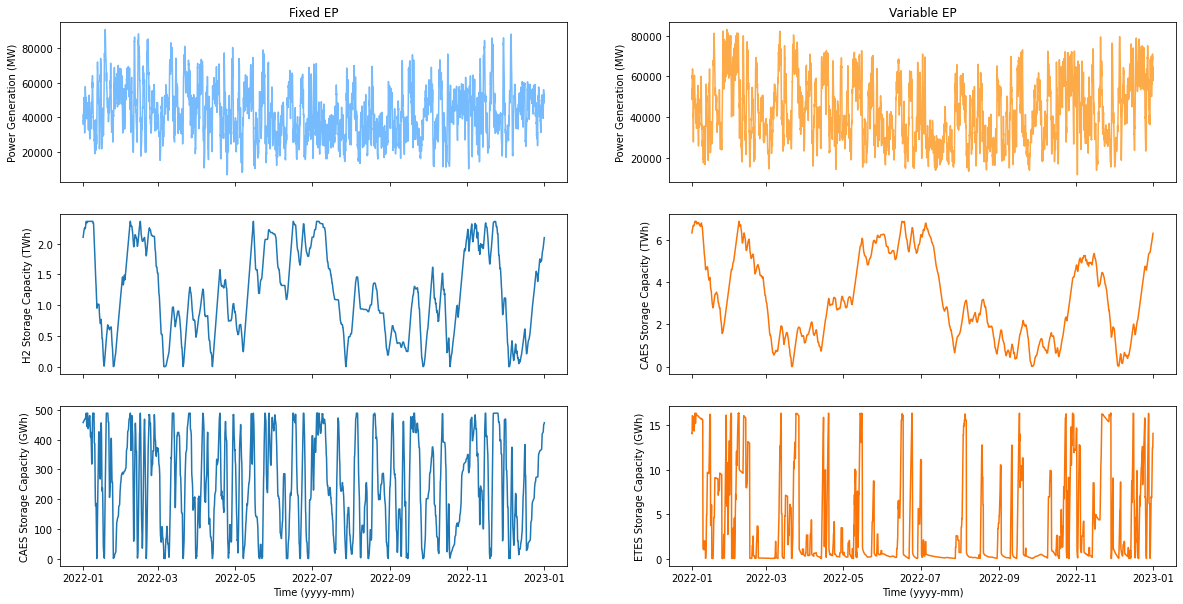

In [91]:
storeplot_df = pd.DataFrame({"generation_F":fixedEPr.generators_t.p.sum(axis=1),
                    "H2_F":h2_soc_t, "CAES_F":caes_soc_t, 
                    "generation_V":varEPr.generators_t.p.sum(axis=1),
                    "CAES_V":caes_stores_t, "ETES_V":etes_stores_t})
storeplot_df.loc[:,'generation_F']

plt.rcParams["figure.figsize"] = [20, 10]

fig, axs = plt.subplots(3,2,sharex=True)

x=pd.date_range("2022-01-01 00:00", "2022-12-31 23:00", freq="H")

axs[0,0].plot(x, storeplot_df.loc[:,'generation_F'],'xkcd:sky blue')
axs[0,0].set_title('Fixed EP')
axs[0,0].set_ylabel('Power Generation (MW)')

axs[0,1].plot(x, storeplot_df.loc[:,'generation_V'], 'xkcd:light orange')
axs[0,1].set_title('Variable EP')
axs[0,1].set_ylabel('Power Generation (MW)')

axs[1,0].plot(x, storeplot_df.loc[:,'H2_F']/1e6)
axs[1,0].set_ylabel('H2 Storage Capacity (TWh)')

axs[1,1].plot(x, storeplot_df.loc[:,'CAES_V']/1e6, 'xkcd:orange')
axs[1,1].set_ylabel('CAES Storage Capacity (TWh)')

axs[2,0].plot(x, storeplot_df.loc[:,'CAES_F']/1e3)
axs[2,0].set_xlabel('Time (yyyy-mm)')
axs[2,0].set_ylabel('CAES Storage Capacity (GWh)')

axs[2,1].plot(x, storeplot_df.loc[:,'ETES_V']/1e3, 'xkcd:orange')
axs[2,1].set_xlabel('Time (yyyy-mm)')
axs[2,1].set_ylabel('ETES Storage Capacity (GWh)')

plt.show()